In [5]:
import astropaint

from astropaint.lib import profile

import healpy as hp 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib import rcParams
#%config InlineBackend.figure_format = "retina"

rcParams["figure.figsize"] = (10,7)
rcParams["text.usetex"] = True
rcParams["font.size"] = 18
rcParams["font.family"] = "stix"
rcParams["figure.dpi"]= 200

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Catalog

The `Catalog` object reads/simulates a halo catalog. The initial catalog must contain the following columns: 

`x` , `y`, `z`, `v_x`, `v_y`, `v_z`, `M_200c`

Instantiating the class without any input will simulate a set of randomly distributed halos

In [6]:
catalog = astropaint.Catalog()

generating random catalog...

Input data has been modified. Rebuild the dataframe using catalog.build_dataframe to update the other parameters as well.


In [9]:
catalog.data.head()

,x,y,z,v_x,v_y,v_z,M_200c
0,69.750481,15.121807,70.044281,-87.420708,-94.255424,-72.782097,2.134225e+11
1,84.543839,-53.392380,1.262171,-96.904373,50.753910,-42.653652,5.956632e+12
2,50.860809,7.858159,85.740463,-37.985409,-84.088844,22.010937,2.793712e+10
3,-68.858566,-54.201405,-48.173706,-23.352234,-72.350418,0.886609,3.658207e+12
4,-36.933792,82.161240,43.421497,57.633335,37.111397,10.874074,2.527761e+13


Extra parameters such as halo radius, distance, etc. can be build using the `build_dataframe()` method

In [10]:
catalog.build_dataframe()

Building the dataframe...



The data frame is stored in the `.data` attribute. 

In [15]:
catalog.data.head()

,x,y,z,v_x,v_y,v_z,M_200c,D_c,lat,lon,...,phi,D_a,R_200c,c_200c,R_th_200c,v_r,v_th,v_ph,v_lat,v_lon
0,69.750481,15.121807,70.044281,-87.420708,-94.255424,-72.782097,2.134225e+11,100.000000,44.462542,12.232343,...,0.213495,100.000000,0.126000,7.367290,4.331558,-126.209184,-21.885992,-73.593097,21.885992,-73.593097
1,84.543839,-53.392380,1.262171,-96.904373,50.753910,-42.653652,5.956632e+12,100.000000,0.723190,327.726162,...,5.719901,100.000000,0.382200,5.334196,13.139062,-109.563760,41.274058,-8.830951,-41.274058,-8.830951
2,50.860809,7.858159,85.740463,-37.985409,-84.088844,22.010937,2.793712e+10,99.999998,59.026414,8.782936,...,0.153291,99.999998,0.063976,8.973553,2.199335,-7.055242,-54.523509,-77.302761,54.523509,-77.302761
3,-68.858566,-54.201405,-48.173706,-23.352234,-72.350418,0.886609,3.658207e+12,100.000002,-28.798913,218.207736,...,3.808443,100.000002,0.324873,5.592513,11.168294,54.867843,-31.174242,42.407338,31.174242,42.407338
4,-36.933792,82.161240,43.421497,57.633335,37.111397,10.874074,2.527761e+13,100.000004,25.735351,114.205260,...,1.993258,100.000004,0.618779,4.636376,21.272054,13.926693,-5.358399,-67.782279,5.358399,-67.782279


In [16]:
catalog.data.columns

Index(['x', 'y', 'z', 'v_x', 'v_y', 'v_z', 'M_200c', 'D_c', 'lat', 'lon',
       'theta', 'phi', 'D_a', 'R_200c', 'c_200c', 'R_th_200c', 'v_r', 'v_th',
       'v_ph', 'v_lat', 'v_lon'],
      dtype='object')

new random catalogs can be created using the `generate_random_halos()` method. If `put_on_shell` is `True` the halos will be distributed over a shell, otherwise they are uniformly distributed in a cubic box. 

In [18]:
catalog.data = catalog.generate_random_halos(n_tot=100,
                                            box_size=5,
                                            mass_min=1E11,
                                            mass_max=1E13,
                                            put_on_shell=True)

generating random catalog...

Input data has been modified. Rebuild the dataframe using catalog.build_dataframe to update the other parameters as well.


In [21]:
catalog.build_dataframe()
catalog.data.head()

Building the dataframe...



,x,y,z,v_x,v_y,v_z,M_200c,D_c,lat,lon,...,phi,D_a,R_200c,c_200c,R_th_200c,v_r,v_th,v_ph,v_lat,v_lon
0,4.293649,-0.741339,2.452549,23.118513,79.833885,24.208027,1.373874e+11,5.0,29.374100,350.203926,...,6.112212,5.0,0.108794,7.688882,74.801398,19.890038,-16.583860,82.603301,16.583860,82.603301
1,1.328238,2.220008,4.278709,-41.585686,72.561302,58.925247,3.516958e+12,5.0,58.841779,59.107769,...,1.031625,5.0,0.320636,5.613915,220.453236,71.594983,4.525620,72.940892,-4.525620,72.940892
2,-3.843498,-1.125962,2.993281,21.598654,-51.770920,31.577810,7.731527e+12,5.0,36.773711,196.328072,...,3.426571,5.0,0.416913,5.200946,286.648184,13.959789,-28.989412,55.755057,28.989412,55.755057
3,3.704671,3.352236,-0.194751,-49.498310,31.283974,-46.702648,5.581027e+11,5.0,-2.232242,42.140913,...,0.735498,5.0,0.173591,6.711395,119.352670,-13.881669,47.279218,56.408172,-47.279218,56.408172
4,-1.353429,-1.094526,4.687243,36.629341,77.016907,52.950867,1.441776e+12,5.0,69.627393,218.962673,...,3.821620,5.0,0.238190,6.121121,163.767106,22.864272,-90.533250,-36.851900,90.533250,-36.851900


Let's put these halos on a canvas!

# Canvas 

The `Canvas` object locates the halo centers and extents on a healpy map. We can initialize it by feeding in a `Catalog` object and an `nside` for the map. 

In [23]:
canvas = astropaint.Canvas(catalog, nside = 128)

Let's check out the locations of the halos with a scatter plot

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


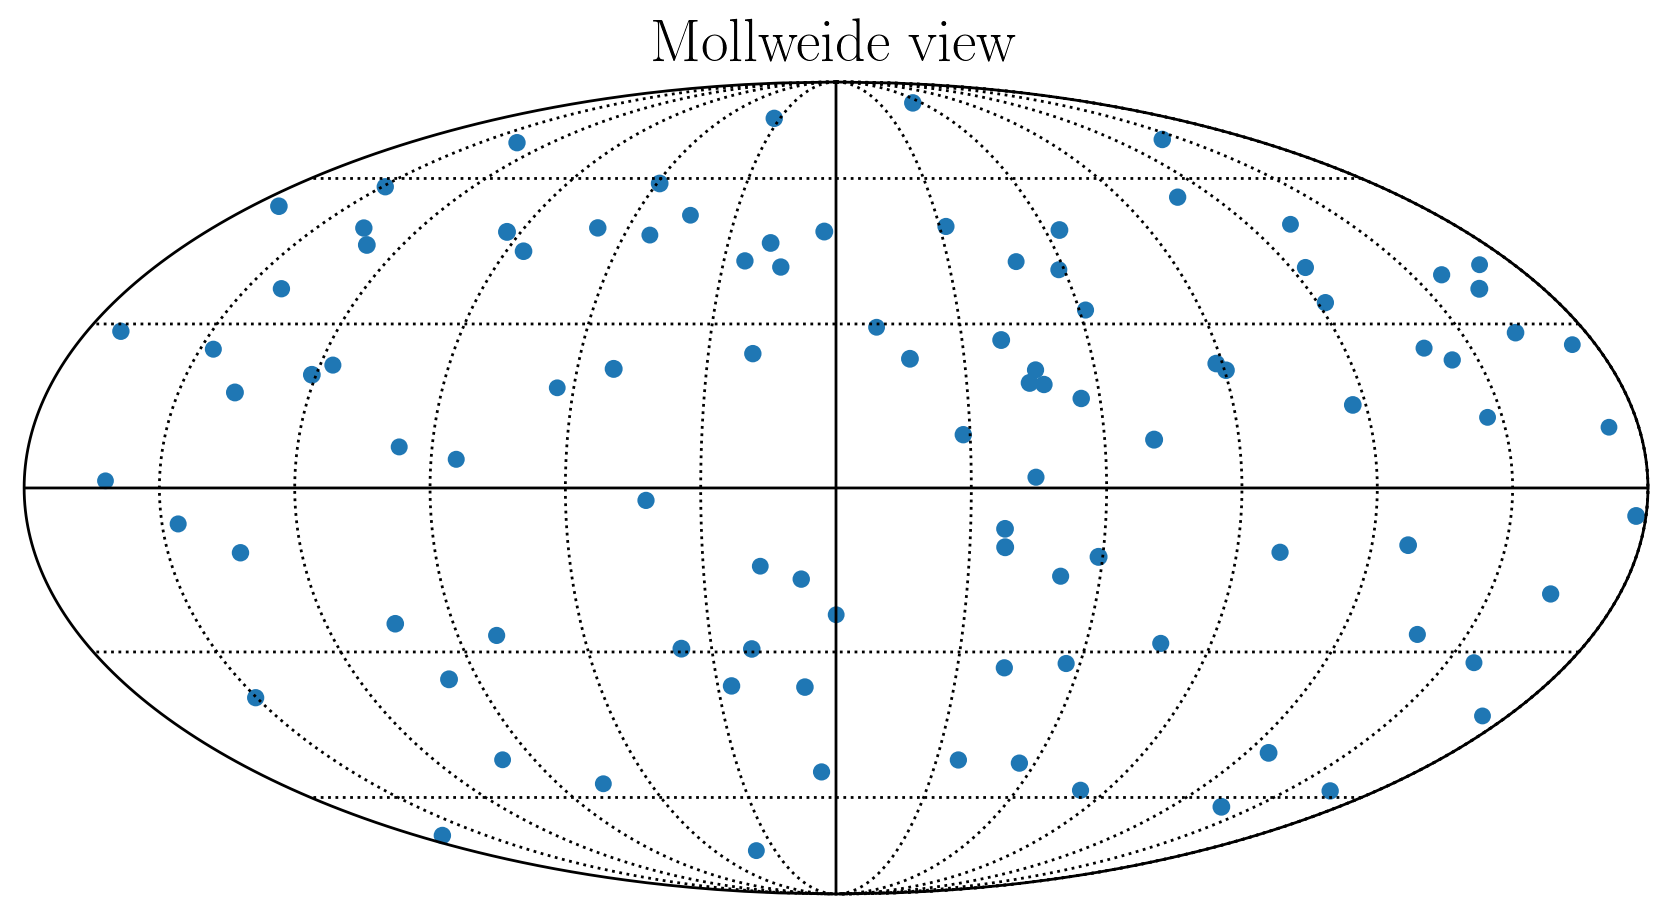

In [25]:
canvas.show_halo_centers("mollview")

and in cartesian projection

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


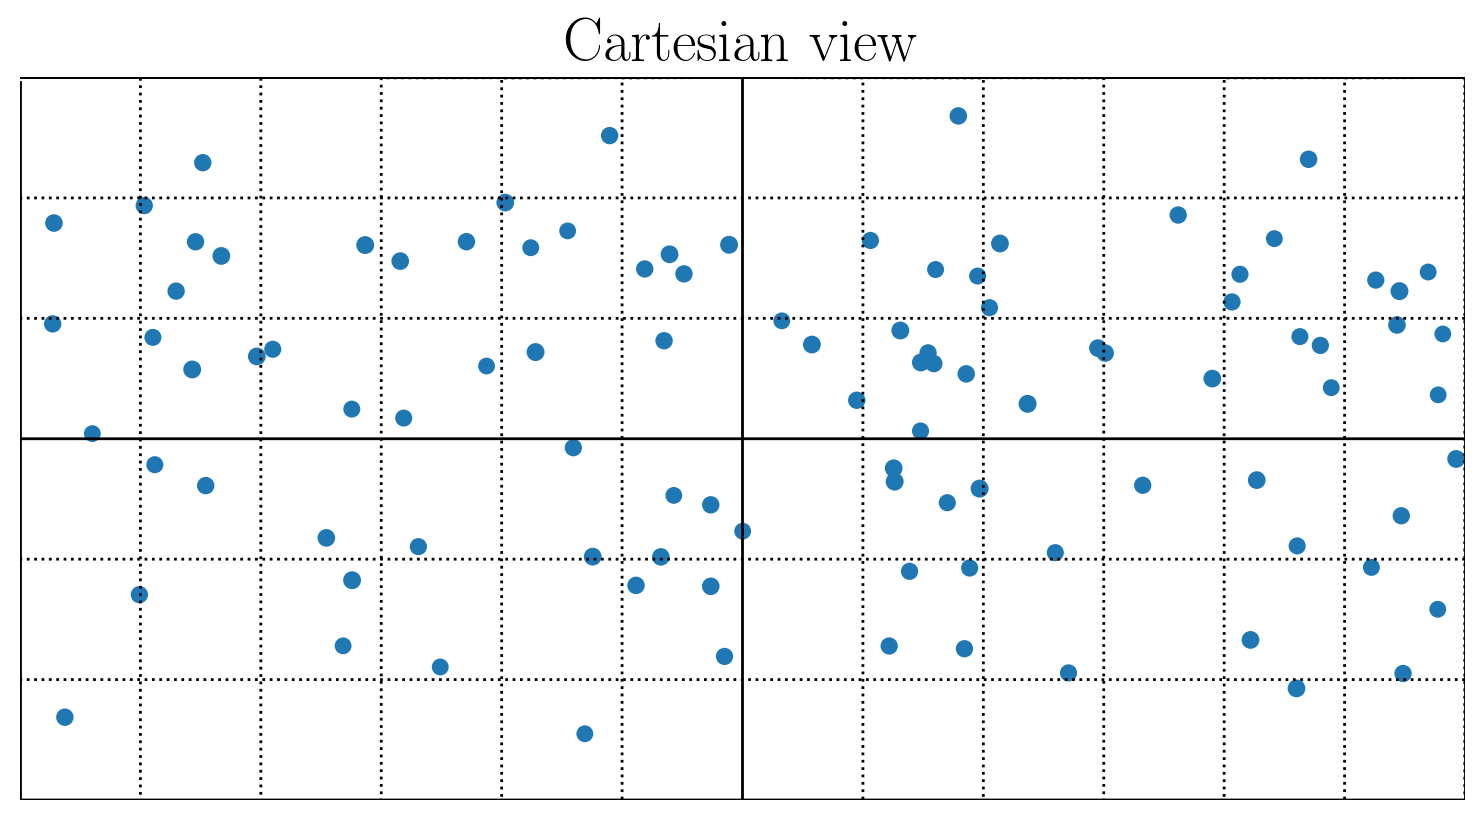

In [26]:
canvas.show_halo_centers("cartview")

The canvas provides methods for finding the pixel number of halo centers, as well as their angular positions in spehrical coordinates

In [29]:
canvas.find_centers_indx()

Done! You can now get the center pixels using Canvas.centers_indx.


In [43]:
canvas.find_centers_ang()

Done! You can now get the angular position of the discs using Canvas.centers_ang.


Similarly you can find the pixels around each halo center using `find_discs_indx(k)`. The method finds all the pixels within `k` times the virial radius of the halo center. 

In [32]:
canvas.find_discs_indx(k=1)

Done! You can now get the discs using Canvas.discs_indx.


And `find_discs_ang()` calculates the angular position of each pixel of the discs.

In [33]:
canvas.find_discs_ang()

Done! You can now get the angular position of the discs using Canvas.discs_ang.


Let's check out the discs

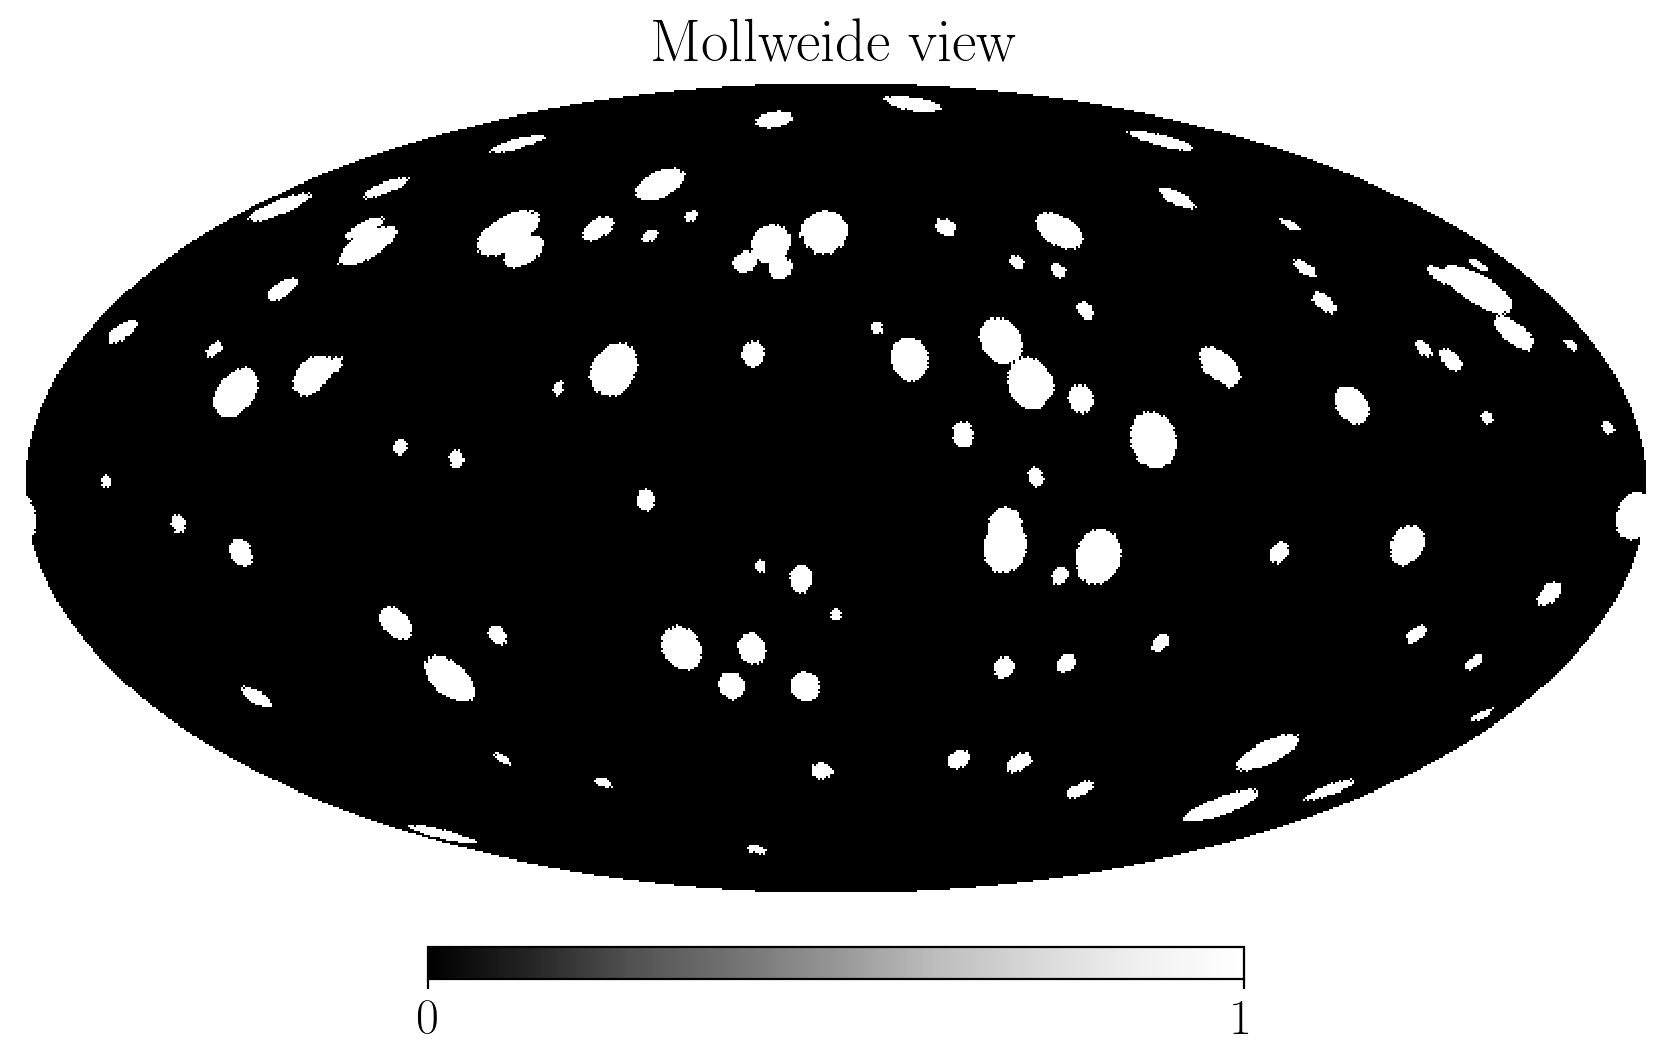

In [36]:
canvas.cmap = cm.Greys_r

canvas.show_discs()

`find_discs_2center_distance()` finds the angular distance of each pixel to the halo center in units of radians and also Mpc. 

In [48]:
canvas.find_discs_2center_distance()

The distances in radians can be accessed via `.discs_ang`

In [56]:
canvas.discs_2center_rad[:2] # the first two halos

[array([0.02040582, 0.01696395, 0.01963869, 0.01996752, 0.01248909,
        0.01185598, 0.01877399, 0.01241959, 0.00497332, 0.01110469,
        0.02121281, 0.01680491, 0.0061663 , 0.00474393, 0.01535742,
        0.0134268 , 0.0070636 , 0.01221223, 0.02124517, 0.01433011,
        0.01377427, 0.02011201, 0.01890813, 0.02138719]),
 array([0.06333686, 0.06120855, 0.06076491, 0.06204225, 0.05947159,
        0.05602656, 0.0543049 , 0.05447084, 0.05650769, 0.06022532,
        0.06293191, 0.0568212 , 0.05197772, 0.04878212, 0.04756873,
        0.04848699, 0.05142255, 0.05605857, 0.06201361, 0.06275352,
        0.05553124, 0.04930824, 0.04450789, 0.04162698, 0.04107235,
        0.04293441, 0.04692584, 0.05256274, 0.05937689, 0.06381561,
        0.05566933, 0.04821512, 0.0418274 , 0.03706408, 0.03460422,
        0.03493856, 0.03799329, 0.04319432, 0.04987338, 0.05751628,
        0.05720027, 0.048774  , 0.0410164 , 0.03438598, 0.02965128,
        0.02780003, 0.02938291, 0.03392216, 0.04043307, 0.

and in units of Mpc via

In [57]:
canvas.discs_2center_mpc[:2] # the first two halos

[array([0.10202909, 0.08481978, 0.09819344, 0.09983759, 0.06244548,
        0.0592799 , 0.09386994, 0.06209796, 0.02486661, 0.05552345,
        0.10606405, 0.08402457, 0.03083152, 0.02371963, 0.07678708,
        0.067134  , 0.03531798, 0.06106114, 0.10622585, 0.07165056,
        0.06887135, 0.10056007, 0.09454067, 0.10693595]),
 array([0.31668431, 0.30604274, 0.30382457, 0.31021128, 0.29735794,
        0.2801328 , 0.27152451, 0.27235418, 0.28253844, 0.30112661,
        0.31465958, 0.28410602, 0.25988863, 0.24391061, 0.23784368,
        0.24243495, 0.25711275, 0.28029288, 0.31006804, 0.3137676 ,
        0.27765623, 0.24654119, 0.22253943, 0.20813488, 0.20536173,
        0.21467204, 0.2346292 , 0.26281372, 0.29688446, 0.31907808,
        0.27834665, 0.24107559, 0.209137  , 0.1853204 , 0.17302113,
        0.17469279, 0.18996647, 0.21597159, 0.24936692, 0.28758138,
        0.28600136, 0.24387002, 0.20508198, 0.17192988, 0.14825642,
        0.13900016, 0.14691454, 0.16961082, 0.20216533, 0.

# Painter

The `Painter` object paints a signal on top of the canvas according to an input template

In [59]:
painter = astropaint.Painter(template=profile.kSZ_T_solid_sphere)

The template 'kSZ_T_solid_sphere' takes in the following arguments:
['r', 'catalog_dataframe']


In [60]:
# change the color map to RdYlBu
canvas.cmap = cm.RdYlBu_r

If the canvas has been painted on previously, it can be cleaned using `.clean()`

In [61]:
canvas.clean()

The painter paints the signal on the canvas using the `.spray()` method

In [62]:
painter.spray(canvas)

Your artwork is fininshed. Check it out with Canvas.show_map()


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


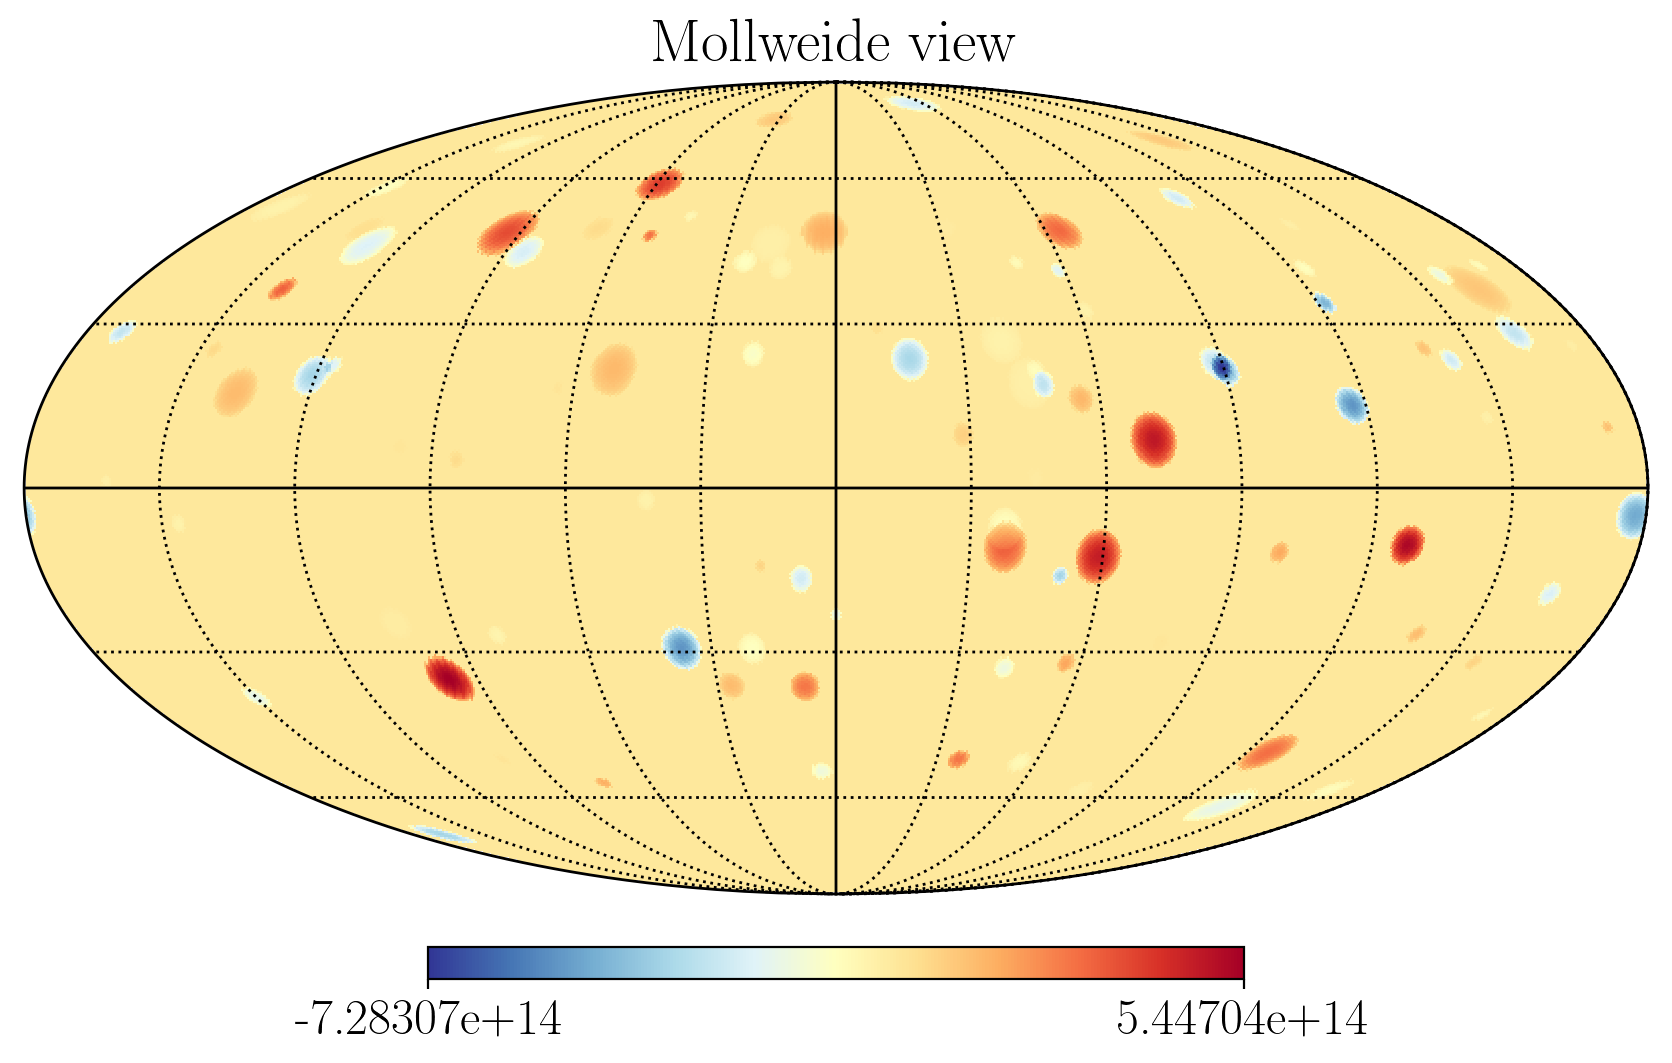

In [63]:
canvas.show_map(projection="mollview")
hp.graticule()

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


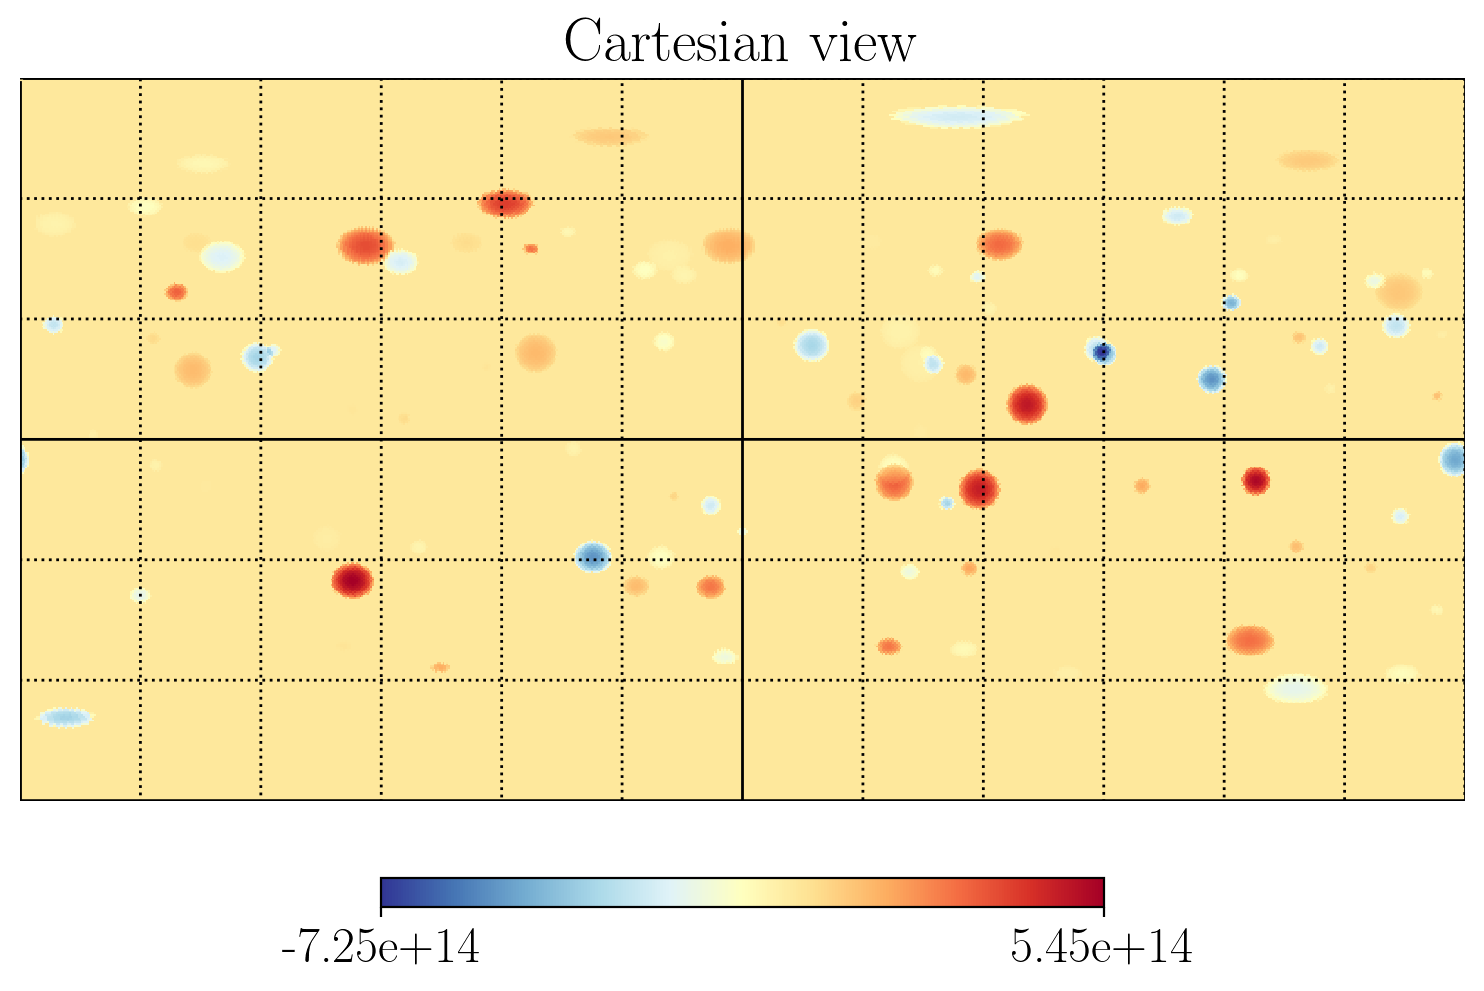

In [64]:
canvas.show_map(projection="cartview")
hp.graticule()